
# Importing Libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Data Preprocessing

In [62]:
#Loading dataset

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# Reading Dataset and displaying first 5 rows
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project/health_dataset.csv')
df.head(5)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [64]:
#Dropping ID Column
df.drop(['id'], axis=1, inplace=True)

In [65]:
#Droping the gender with value other
df = df[df['gender'] != 'Other']

In [66]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


<ipython-input-34-c16d6aeaeb0b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


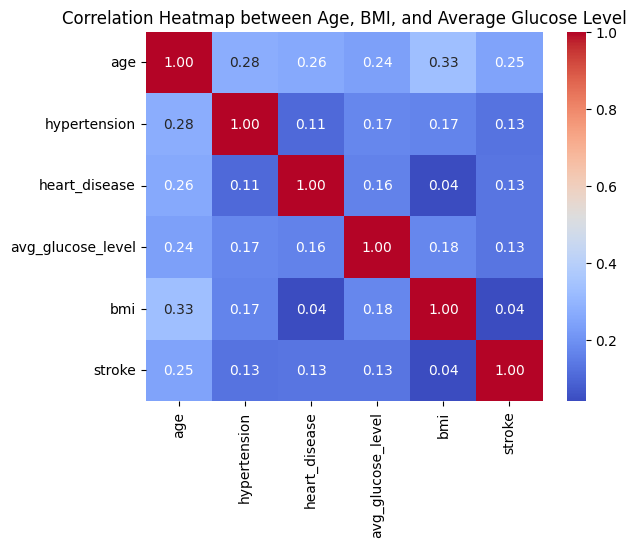

In [34]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Age, BMI, and Average Glucose Level')
plt.show()

In [35]:
# from sklearn.preprocessing import OneHotEncoder
# categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
# categorical_data = df[categorical_variables]
# encoder = OneHotEncoder(sparse_output = False)
# encoded_data = encoder.fit_transform(categorical_data)
# encoded_dataframe = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_variables))
# df = pd.concat([df.drop(columns=categorical_variables), encoded_dataframe], axis=1)
# df.head(5)

In [36]:
# Encoding Categorical Values using one-hot encoding
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,1,0,1,0,0,0,1,0,0


In [37]:
df.isnull().sum()

age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
stroke                              0
gender_Male                         0
ever_married_Yes                    0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Urban                0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

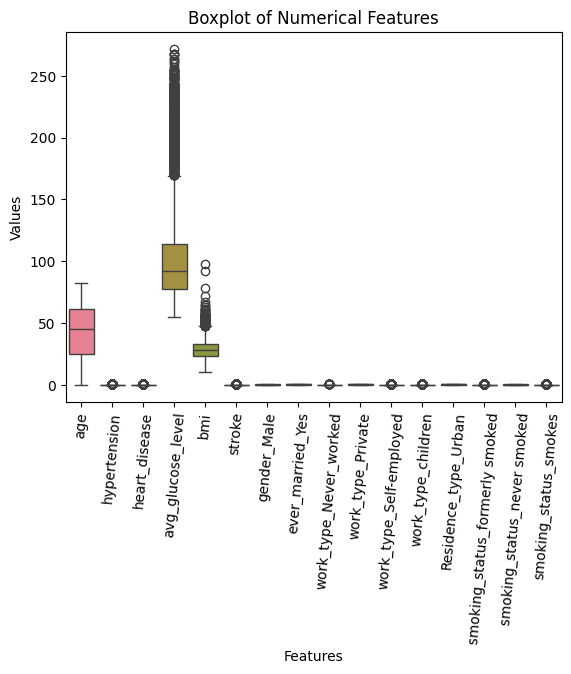

In [38]:
#Outlier Detecting using Box plot
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=85)  # Rotate x-axis labels for better readability
plt.show()

In [39]:
from scipy.stats import t
import numpy as np

def grubbs_test(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data)
    t_critical = t.ppf(1 - alpha / (2 * n), n - 2)
    threshold = (n - 1) * t_critical / np.sqrt(n * (n - 2) + t_critical ** 2)
    G = np.max(np.abs(data - mean)) / std_dev
    return G, threshold, G > threshold


G_value, G_threshold, is_outlier = grubbs_test(df)
print("Grubbs' Test Results:")
print("G Value:", G_value)
print("G Threshold:", G_threshold)
print("Is Outlier Detected:", is_outlier)

Grubbs' Test Results:
G Value: age                                1.908332
hypertension                       3.042866
heart_disease                      4.184599
avg_glucose_level                  3.657189
bmi                                8.748363
stroke                             4.417926
gender_Male                        1.189791
ever_married_Yes                   1.381830
work_type_Never_worked            15.206159
work_type_Private                  1.156812
work_type_Self-employed            2.288689
work_type_children                 2.537062
Residence_type_Urban               1.016380
smoking_status_formerly smoked     2.186187
smoking_status_never smoked        1.303962
smoking_status_smokes              2.339933
dtype: float64
G Threshold: 4.426285443819081
Is Outlier Detected: age                               False
hypertension                      False
heart_disease                     False
avg_glucose_level                 False
bmi                                Tru

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [40]:
from scipy.stats import t
import numpy as np

def dixons_q_test(data, alpha=0.05):
    n = len(data)
    sorted_data = np.sort(data)
    Q_calculated = (sorted_data[1] - sorted_data[0]) / (sorted_data[-1] - sorted_data[0])
    Q_critical = t.ppf(1 - alpha / (2 * n), n - 2)
    return Q_calculated, Q_critical, Q_calculated > Q_critical

# Example usage:
sample_data = df
Q_value, Q_critical, is_outlier = dixons_q_test(sample_data)
print("Dixon's Q Test Results:")
print("Q Value:", Q_value)
print("Q Critical:", Q_critical)
print("Is Outlier Detected:", is_outlier)


Dixon's Q Test Results:
Q Value: [        nan         nan         nan         nan         nan         nan
  1.          1.          1.         -0.         -0.                 nan
         nan -2.34615385 -5.87869565         nan]
Q Critical: 4.426287020827712
Is Outlier Detected: [False False False False False False False False False False False False
 False False False False]


<ipython-input-40-bb293fc88d2d>:7: RuntimeWarning: invalid value encountered in divide
  Q_calculated = (sorted_data[1] - sorted_data[0]) / (sorted_data[-1] - sorted_data[0])


In [41]:
#Handle BMI Missing Values

# # drop the missing values
# df.dropna(subset=['bmi'], inplace=True)

# Using Pandas fillna method
median_bmi = df['bmi'].median()
df['bmi'].fillna(median_bmi, inplace=True)

# #Filling missing values using simple imputer's median strategy (used for multiple cols.)
# imputer = SimpleImputer(strategy='median')
# df['bmi'] = imputer.fit_transform(df[['bmi']])


In [42]:
# Checking for Null values in dataset after handling
df.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [43]:
from scipy.stats import t
import numpy as np

def grubbs_test(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data)
    t_critical = t.ppf(1 - alpha / (2 * n), n - 2)
    threshold = (n - 1) * t_critical / np.sqrt(n * (n - 2) + t_critical ** 2)
    G = np.max(np.abs(data - mean)) / std_dev
    return G, threshold, G > threshold


G_value, G_threshold, is_outlier = grubbs_test(df)
print("Grubbs' Test Results:")
print("G Value:", G_value)
print("G Threshold:", G_threshold)
print("Is Outlier Detected:", is_outlier)

Grubbs' Test Results:
G Value: age                                1.908332
hypertension                       3.042866
heart_disease                      4.184599
avg_glucose_level                  3.657189
bmi                                8.927967
stroke                             4.417926
gender_Male                        1.189791
ever_married_Yes                   1.381830
work_type_Never_worked            15.206159
work_type_Private                  1.156812
work_type_Self-employed            2.288689
work_type_children                 2.537062
Residence_type_Urban               1.016380
smoking_status_formerly smoked     2.186187
smoking_status_never smoked        1.303962
smoking_status_smokes              2.339933
dtype: float64
G Threshold: 4.426285443819081
Is Outlier Detected: age                               False
hypertension                      False
heart_disease                     False
avg_glucose_level                 False
bmi                                Tru

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


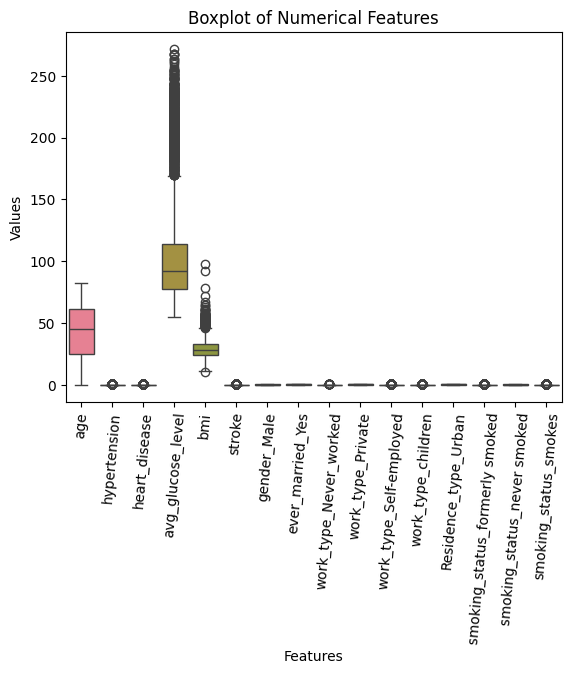

In [44]:
#Outlier Detecting using Box plot
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=85)  # Rotate x-axis labels for better readability
plt.show()

In [45]:
#Checking for Skewness in the dataset
df.skew().sort_values(ascending=False)

work_type_Never_worked            15.144843
stroke                             4.192807
heart_disease                      3.946786
hypertension                       2.715026
work_type_children                 2.143534
smoking_status_smokes              1.913132
work_type_Self-employed            1.852301
smoking_status_formerly smoked     1.729277
avg_glucose_level                  1.572815
bmi                                1.087929
smoking_status_never smoked        0.537226
gender_Male                        0.349410
Residence_type_Urban              -0.032506
age                               -0.137430
work_type_Private                 -0.292454
ever_married_Yes                  -0.658345
dtype: float64

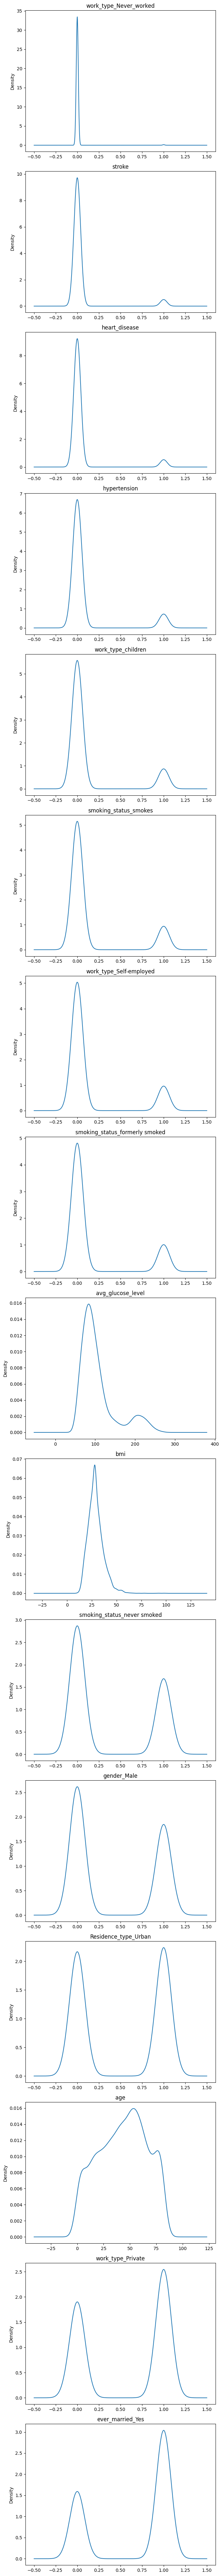

In [46]:
# Visualizing skewness for each attribute in the dataset


# List of parameters for density plot
parameters = ['work_type_Never_worked', 'stroke', 'heart_disease', 'hypertension',
              'work_type_children', 'smoking_status_smokes', 'work_type_Self-employed',
              'smoking_status_formerly smoked', 'avg_glucose_level', 'bmi',
              'smoking_status_never smoked', 'gender_Male', 'Residence_type_Urban',
              'age', 'work_type_Private', 'ever_married_Yes']

# Create subplots
fig, axes = plt.subplots(len(parameters), 1, figsize=(7, 5 * len(parameters)))

# Loop through parameters and plot density plots
for i, param in enumerate(parameters):
    df[param].plot(kind='density', ax=axes[i])
    axes[i].set_title(param)

plt.tight_layout()
plt.show()

In [47]:
# List of attributes to analyze
attributes = ['stroke', 'heart_disease', 'hypertension', 'avg_glucose_level', 'bmi',
    'age', 'gender_Male', 'Residence_type_Urban', 'ever_married_Yes',
    'work_type_children', 'work_type_Private', 'work_type_Self-employed',
    'work_type_Never_worked', 'smoking_status_smokes',
    'smoking_status_formerly smoked', 'smoking_status_never smoked']
# Dictionary to store skewness before and after transformations
skewness_results = {}

for attribute in attributes:
    try:
        # Display skewness before transformation
        attribute_skewness = df[attribute].skew()
        print(f"\nSkewness of '{attribute}': {attribute_skewness}")

        # Apply log transformation
        log_attribute = np.log1p(df[attribute])
        log_skewness = log_attribute.skew()
        print(f"Skewness after Log Transformation: {log_skewness}")

        # Apply sqrt transformation
        sqrt_attribute = df[attribute]**(1/2)
        sqrt_skewness = sqrt_attribute.skew()
        print(f"Skewness after Square Root Transformation: {sqrt_skewness}")

        # Apply reciprocal transformation
        reciprocal_attribute = 1 / df[attribute]
        reciprocal_skewness = reciprocal_attribute.skew()
        print(f"Skewness after Reciprocal Transformation: {reciprocal_skewness}")

        # Apply Box-Cox transformation
        bcx_attribute, _ = boxcox(df[attribute])
        bcx_skewness = pd.Series(bcx_attribute).skew()
        print(f"Skewness after Box-Cox Transformation: {bcx_skewness}")

        # Apply Yeo-Johnson transformation
        yf_attribute, _ = yeojohnson(df[attribute])
        yf_skewness = pd.Series(yf_attribute).skew()
        print(f"Skewness after Yeo-Johnson Transformation: {yf_skewness}")

        # Store skewness results in dictionary
        skewness_results[attribute] = {
            'Original': attribute_skewness,
            'Log': log_skewness,
            'Square Root': sqrt_skewness,
            'Reciprocal': reciprocal_skewness,
            'Box-Cox': bcx_skewness,
            'Yeo-Johnson': yf_skewness
        }
    except Exception as e:
        print(f"Error occurred while processing '{attribute}': {e}")


Skewness of 'stroke': 4.1928068074994735
Skewness after Log Transformation: 4.192806807499474
Skewness after Square Root Transformation: 4.1928068074994735
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'stroke': Data must be positive.

Skewness of 'heart_disease': 3.9467864430646906
Skewness after Log Transformation: 3.9467864430646906
Skewness after Square Root Transformation: 3.9467864430646906
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'heart_disease': Data must be positive.

Skewness of 'hypertension': 2.715026136949753
Skewness after Log Transformation: 2.7150261369497537
Skewness after Square Root Transformation: 2.715026136949753
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'hypertension': Data must be positive.

Skewness of 'avg_glucose_level': 1.5728153284961561
Skewness after Log Transformation: 0.8900502459430992
Skewness after Square Root Transformation: 1.243310584696458
Sk

In [48]:
## Applying skewness from calculated
df['avg_glucose_level'], lambda_bc = boxcox(df['avg_glucose_level'])
df['bmi'], lambda_yj = yeojohnson(df['bmi'])

In [49]:
df.skew().sort_values(ascending=False)

work_type_Never_worked            15.144843
stroke                             4.192807
heart_disease                      3.946786
hypertension                       2.715026
work_type_children                 2.143534
smoking_status_smokes              1.913132
work_type_Self-employed            1.852301
smoking_status_formerly smoked     1.729277
smoking_status_never smoked        0.537226
gender_Male                        0.349410
avg_glucose_level                  0.083304
bmi                               -0.001035
Residence_type_Urban              -0.032506
age                               -0.137430
work_type_Private                 -0.292454
ever_married_Yes                  -0.658345
dtype: float64

In [50]:
# Label selection
y = df['stroke']
X= df.drop('stroke',axis=1)

In [51]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Normalising using standard scalar
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)


In [53]:
# PCA
pca = PCA()
scaled_x_train_pca = pca.fit_transform(scaled_x_train)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = pca.explained_variance_ratio_.cumsum()
# total_explained_variance_ratio = explained_variance_ratio.sum()
cumulative_sum_np = np.cumsum(explained_variance_ratio)

print(f"\nExplained Variance Ratio:\n{explained_variance_ratio}")
# print(f"Total Explained Variance Ratio: {total_explained_variance_ratio:.4f}")


Explained Variance Ratio:
[0.20320415 0.11231769 0.09464117 0.07885601 0.07517792 0.06863055
 0.06510185 0.06150885 0.0586444  0.05637946 0.04345521 0.03283821
 0.0198793  0.01780459 0.01156065]


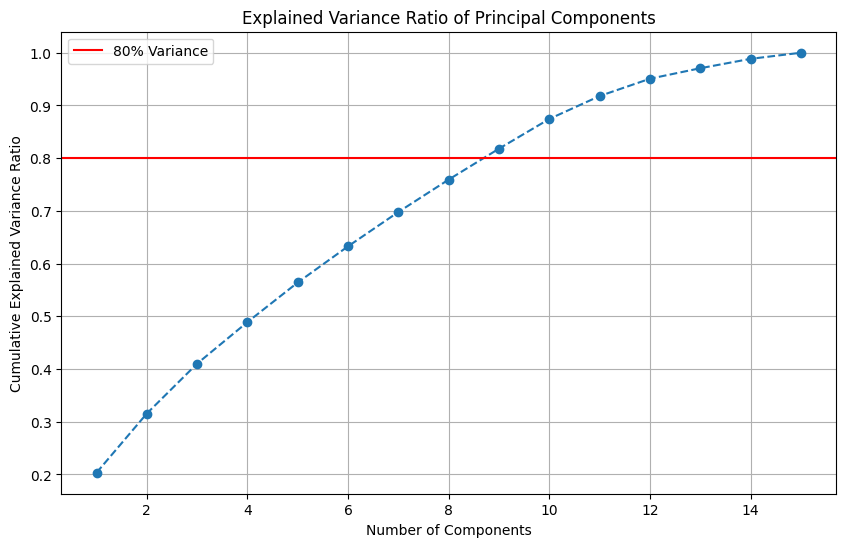

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), cumulative_sum , marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.axhline(y=0.8, color='r', linestyle='-', label='80% Variance')
plt.legend()
plt.grid()
plt.show()

In [55]:
scaled_x_train.shape

(4087, 15)

In [56]:
pca = PCA(.90)
pca.fit(scaled_x_train)
pca.n_components_

11

In [57]:
pca = PCA(.80)
pca.fit(scaled_x_train)
pca.n_components_

9

In [ ]:
pca = PCA(n_components=11)
X_train_pca = pca.fit_transform(scaled_x_train)
X_test_pca = pca.transform(scaled_x_test)